Accuracy: 0.7752380952380953


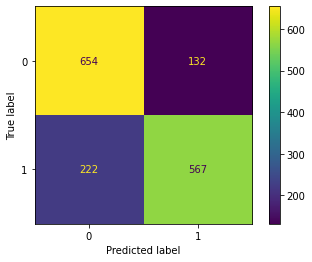

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# PREDICTING CROWDFUNDING SUCCESS 
import json, joblib, requests, sklearn.metrics, matplotlib.pyplot as plt, sklearn.model_selection, sklearn.tree,google.colab.files

response = requests.get("https://dgoldberg.sdsu.edu/515/kiva_data_full.json")

if response:
    data = json.loads(response.text)

    x = []
    y = []

    for line in data:
 
         length = line["length"]
         pictures = line["number_of_pictures"]
         loan = line["loan_amount"]
         if line["bonus_credit_eligibility"] == "yes":
             a = 1
         else:
             a = 0
        
         if line["user_favorite_post"] == "yes":
             b = 1
         else:
             b = 0

         if line["loan_status"] == "funded":
             y.append(1)
         else:
             y.append(0)

         inner_list = [length, pictures, loan, a, b]
         x.append(inner_list)
    #print(y)
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, random_state = 0)

    clf = (sklearn.tree.DecisionTreeClassifier())
    clf = clf.fit(x_train, y_train)
# print accuracy
    predictions = clf.predict(x_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
#confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_test, predictions)
    disp = sklearn.metrics.ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()
    
    joblib.dump(clf, "kiva_decision_tree.joblib")
    google.colab.files.download("kiva_decision_tree.joblib")

else:
    print("Sorry, connection error.")